<a href="https://colab.research.google.com/github/min207/2023-1-ESAA/blob/main/ESAA230522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART03. 케라스(Keras)**

## **01 딥러닝 준비**
### **1-1. 주요 용어**
**1-1-1 하이퍼파라미터**
- 하이퍼파라미터: 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 
  + 설정된 값에 따라 모델의 성능 및 결과가 달라지기 때문에 매우 중요
  + 별도의 설정이 없으면 기본값이 지정되어 적용
  + 하이퍼파라미터의 값을 조절하는 것을 하이퍼파라미터 튜닝이라고 함

**1-1-2 과소적합 vs. 과대적합**
- train set: 모델 훈련을 위해 머신러닝 모델이 학습할 데이터
- test set: 정답 레이블이 없는 머신러닝 모델이 예측해야하는 데이터
- 훈련 데이터에서 패턴 학습을 통해 모델을 완성해나가는데, 이때 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나 학습한 데이터가 특정 레이블에 편향되어 있다면 예측 성능이 떨어지게 됨
- 과소적합: 모델이 충분히 학습되지 않은 경우 
- 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 경우
  + 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 훈련데이터에 대한 예측 성능이 좋지만, 예측 데이터에 대한 예측 오차가 발생할 확률이 큼
-과소/과대적합 문제를 최소화하며 정확도를 높여야함
  + 불필요한 노이즈는 전처리를 통해 미리 처리
  + 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간으로 최종 모델 결정 

**1-1-3 에포크**
- 딥러닝은 데이터셋을 학습하는 과정을 여러번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정
- 에포트(epoch): 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프
  + 사전에 설정된 최대 에포크 횟수까지 반복적으로 진행 후 학습 종료

**1-1-4 손실함수**
- 손실함수: 예측 값과 정답 값의 차이 또는 오차
  + 오차: 딥러닝 모델의 출력 값과 실제 값의 차이

- 딥러닝 모델에 적용하는 손실함수는 사용자가 직접 정의해야함
  + 일반적으로 분류, 회귀 모델에 따라 손실함수를 다르게 적용

- 지도학습의 분류: 이진 분류, 다중 분류
  + 이진분류: binary_crossentropy 손실함수를 사용, 출력층의 활성화 함수는 sigmoid
  + 다중분류: 원핫 벡터인 경우 categorical_crossentropy 손실함수 사용, 아닐 경우 sparse_categorical_crossentropy 손실함수 사용, 출력층의 활성함수는 softmax

- 지도학습의 회귀 모델: 평균제곱오차(MSE), 평균절대값오차(MAE), 후버(Huber) 등을 사용

- 텐서플로는 사전 정의된 손실함수를 함수형과 클래스형으로 제공

**1-1-5 경사하강법**
- 경사하강법: 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법
  1. 손실함수 혹은 목적함수 정의 
  2. 단순선형회귀 수식이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 경사하강법으로 구하는 과정 구현
  3. 샘플 데이터셋을 생성하는 함수를 정의하고, 임의의 w와 b 값을 지정하여 주어진 x에 대한 y 값 생성(약간의 노이즈 추가) 


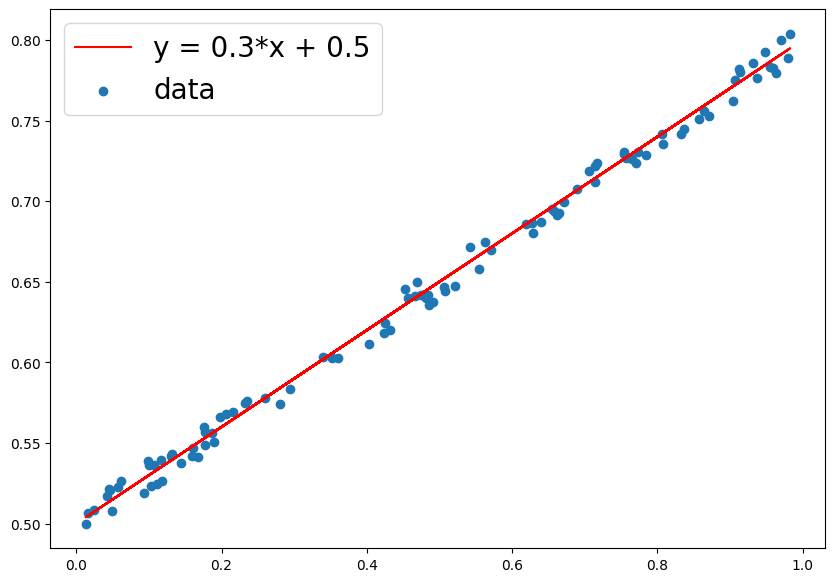

w: 0.3, b: 0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 생성 함수
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # 약간의 노이즈 추가
    yy = y + noise

    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

> - 경사하강법 알고리즘의 핵심인 w, b에 대한 그래디언트를 구하는 부분 구현
- 그래디언트는 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로 부터 차감 

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.27583, b = 0.37802 error = 6.32961
 5 w = 0.32474, b = 0.48499 error = 0.00594
------------------------------------------------------------
 8 w = 0.3, b = 0.5 error = 0.00485


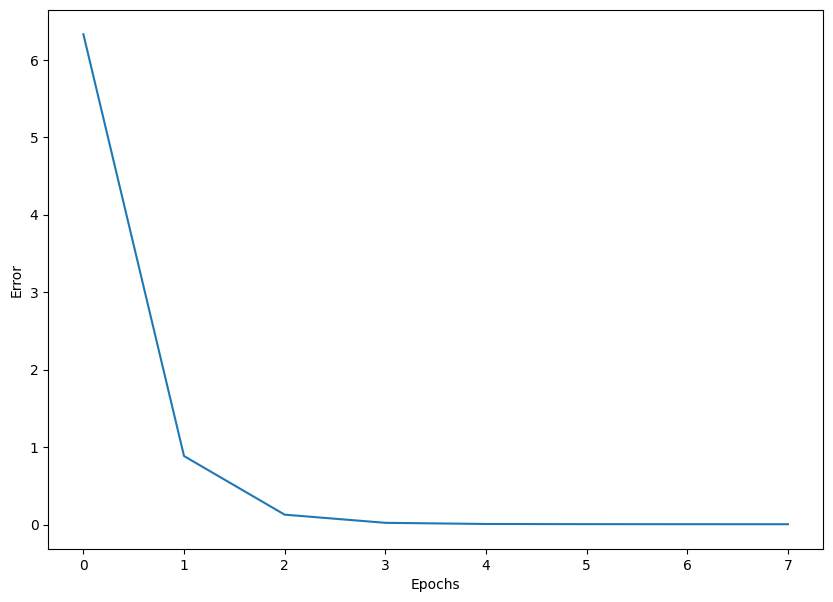

In [4]:
# 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

> - 가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도에는 차이가 있음

### **1-2 딥러닝 프로세스**
- 데이터 로드 > 데이터 전처리 > 데이터 분할 > 모델 생성/컴파일 > 훈련 > 검증 > 예측

**1-2-1 데이터 전처리**
- 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계
  + 배열의 차원을 변경하거나 스케일 조정
  + 데이터셋의 형태나 차원을 미리 구상해야 모델을 설계할 때 입력할 데이터셋의 형태를 올바르게 정의할 수 있음
  + 전처리 단계에서 처리한 데이터셋의 단계와 모델이 입력받을 데이터셋의 형태가 다르면 에러가 발생

**1-2-2 모델 생성**
- 모델의 구조를 정의하고 생성하는 단계
  + 순차적인 구조의 모델: Sequential API로 구현
  + 다중 입력 및 출력을 가지고 복잡한 구조의 모델: Functional API 혹은 Model Subclassing 방법으로 구현

**1-2-3 모델 컴파일**
- 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표를 정의하는 단계
`+ 모델 인스턴스에 compile) 메소드를 적용하여 여러 가지 속성 값 설정

**1-2-4 모델 훈련**
- 모델을 훈련하는 단계
  + fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달
  + 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 지정

**1-2-5 모델 검증**
- 훈련이 완료된 모델을 검증하는 단계
  + 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측값을 정답과 비교하여 평가지표 계산
  + 검증 결과를 토대로 잠재적인 모델의 성능 평가 수행
  + 목표 성능에 도달할 때까지 모델 생성 단계로 돌아가 수정하는 과정을 반복

**1-2-6 모델 예측**
- 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환하는 단계


----

## **02 단순 신경망 훈련**
### **2-1 선형회귀**
- 회귀 분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
  + 단순선형회귀 모형: 하나의 x가 y에 미치는 영향을 추정하며 1차 함수 관계로 표현 가능
  + 1차 함수 식에서 기울기는 가중치 w,  y 절편은 편향 b

### **2-2 뉴런**
- 뉴런: 인공 신경망 모델을 구성하는 하나의 신경
  + 노드라고 부르기도 함
- 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성
  + 뉴런의 내부에는 가중치가 존재하는데, 모델 훈련에서 오차 역전파를 통해 가중치를 업데이트 

### **2-3 Dense 레이어**
- Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어
  + 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라고 부르기도 함
  + Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정 가능

### **2-4 데이터셋 만들기**
- 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해서 x, y 데이터 생성

In [5]:
# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2

print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


> - 생성한 데이터를 matplotlib 시각화 라이브러리를 활용해 그래프 출력 

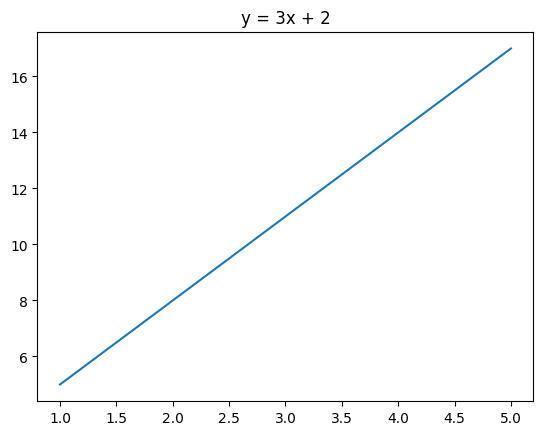

In [6]:
# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### **2-5 Sequential API**
- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
  + 입력 레이어부터 출력 레이어까지 순서를 가짐

- 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하며 딥러닝 연산 수행 
  + 직관적인 구조를 가지기 떄문에 케라스 모델 중 가장 간단한 방법
  + 다중 입력이나 다중 출력을 갖는 구조를 만들 수 없다는 단점이 있음

**2-5-1 모델 구조**
- 두 가지 방법으로 모델 구성
  + 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층 입력하는 방식 
    ```python
  import tensorflow as tf
  # 리스트형
  model = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(5),
          tf.keras.layers.Dense(1)
          ])
  ```
  + add 함수로 레이어 추가로 Sequential 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식 
    ```python
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Dense(5))
  model.add(tf.keras.layers.Dense(1))
  ```

**2-5-2 입력 데이터 형테**
- 첫 번째 층은 반드시 input_shape 매개변수를 지정
  + 주입할 데이터셋의 shape을 튜플 혹은 리스트로 지정 가능 
  ```python
  import tensorflow as tf
  model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
  ])
  ```

**2-5-3 단순선형회귀 모델 정의**
- 1개의 뉴런을 가지는 Dense 레이어 한 개 사용
  + 입력 변수 1개만 존재하기 때문에 input_shape = [1]로 지정

In [7]:
import tensorflow as tf
 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
        ])

### **2-6 모델 요약**
- model.summary()로 모델의 요약 확인 가능 
  + 모델의 구조를 확인할 수 있으며 층별 노드의 개수, 훈련 시 업데이트할 파라미터의 개수 표시 

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### **2-7 컴파일**
- 모델에 적용할 옵티마이저, 손실함수, 평가지표 정의
  + 클래스 인스턴스, 함수, 사전 정의된 문자열로 지정 가능 
  + 클래스 인스턴스로 지정할 경우 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있음
  + 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하지만, 수정이 어렵다는 한계가 있음

In [9]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [10]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [11]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

> - 옵티마이저는 확률적 경사하강법 알고리즘인 'sgd', 손실함수로는 평균제곱오차인 'mse', 평가지표는 평균절대오차인 'mae'를 지정 

In [12]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### **2-8 훈련**
- 모델 인스턴스에 fit() 메소드 적용
  + 모델 훈련: 가중치 텐서를 업데이트하는 과정

- fit() 메소드에는 훈련용 데이터셋의 입력과 정답에 해당하는 출력, 반복 훈련할 epoch 수를 지정
  + verbose=0 옵션을 지정하면, 중간 과정을 출력하지 않음 
  + 검증 데이터셋 옵션을 지정했다면, 검증 셋에 대한 손실과 평가지표도 함꼐 출력 

- fit() 메소드가 반환하는 history 변수는 epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장

In [13]:
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 559ms/step - loss: 69.6580 - mae: 7.8735
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 40.7302 - mae: 6.0639
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 23.8716 - mae: 4.6822
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 14.0463 - mae: 3.6273
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 8.3197 - mae: 2.8219


> - 과소적합 상태, epoch를 1200로 증가 

In [14]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
        ])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 379ms/step - loss: 295.9632 - mae: 15.9057
Epoch 2/1200
1/1 [==============================] - 0s 15ms/step - loss: 172.5058 - mae: 12.1684
Epoch 3/1200
1/1 [==============================] - 0s 11ms/step - loss: 100.5606 - mae: 9.3152
Epoch 4/1200
1/1 [==============================] - 0s 12ms/step - loss: 58.6344 - mae: 7.1371
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 34.2016 - mae: 5.4743
Epoch 6/1200
1/1 [==============================] - 0s 13ms/step - loss: 19.9632 - mae: 4.2048
Epoch 7/1200
1/1 [==============================] - 0s 14ms/step - loss: 11.6655 - mae: 3.2357
Epoch 8/1200
1/1 [==============================] - 0s 14ms/step - loss: 6.8298 - mae: 2.4958
Epoch 9/1200
1/1 [==============================] - 0s 15ms/step - loss: 4.0116 - mae: 1.9308
Epoch 10/1200
1/1 [==============================] - 0s 10ms/step - loss: 2.3691 - mae: 1.4995
Epoch 11/1200
1/1 [============================

> - history 변수를 사용하여 epoch별 훈련 손실 및 평가지표 시각화 

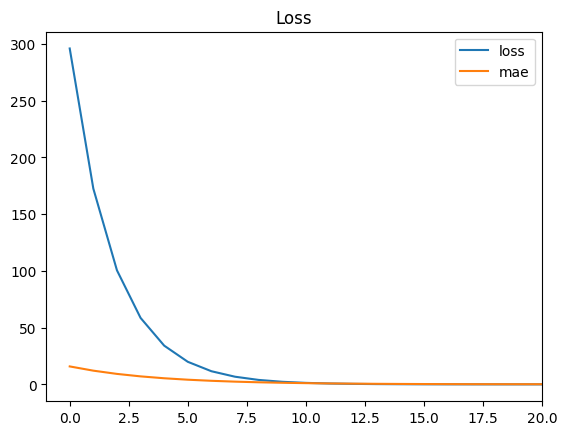

In [15]:
# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')

plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()

plt.show()

> - 10 epoch까지 손실이 급격히 감소하는 것을 확인 가능 

### **2-9 검증**
- evaluate() 메소드로 모델의 성능 검증 
  + 모든 epoch를 종료한 상태에서 출력된 값과 동일 

In [16]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 244ms/step - loss: 2.3769e-05 - mae: 0.0042


[2.376872544118669e-05, 0.004184722900390625]

### **2-10 예측**
- predict() 메소드에 새로운 입력 데이터를 넣어주면 모델의 예측 값을 얻을 수 있음 

In [17]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 156ms/step


array([[32.020226]], dtype=float32)

## **03. 심층 신경망으로 이미지 분류**
- 이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성

----
### **3-1 케라스 내장 데이터셋 로드**
- tensorflow.keras.datasets 서브패키지에 위치
  + boston_housing: 보스톤 주택 가격 데이터셋
  + cifar10: CIFAR10 이미지 분류 데이터셋
  + cifar100: CIFAR100 이미지 분류 데이터셋
  + mnist: mnist: 손글씨 데이터셋
  + fashion_mnist: 의류 데이터셋
  + imdb: IMDb 영화 데이터셋
  + reuters: Reuters 뉴스 토픽

In [18]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

- load_data() 메소드 사용: 훈련 데이터셋과 검증 데이터셋 구분하여 제공 
  + mnist 변수에 load_data() 메소드를 적용하면 넘파이 배열로 구성된 데이터셋 다운로드
  + 훈련 셋과 검증 셋을 튜플 형태로 정의 

In [19]:
# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


> - 훈련 셋에는 60000개, 검증 셋에는 10000개의 데이터가 1차원 벡터 형태로 저장된 것을 확인 

In [20]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


> - 이미지 시각화
  + 손글씨 이미지 상단에 정답을 함께 표시 

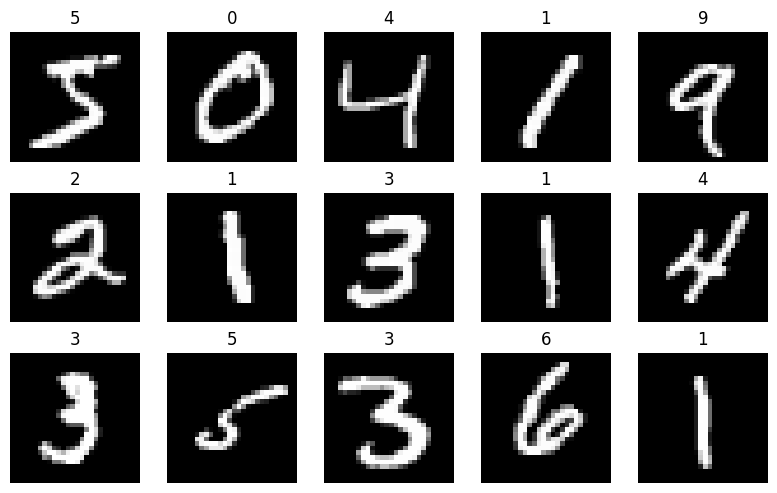

In [21]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

> - 0~9까지 총 10개의 정답 레이블로 구성





### **3-2 데이터 전처리**
- 이미지 데이터에 대해 정규화를 통해 데이터 범위 조절 

In [22]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

> - 데이터의 범위를 0~1 사이의 값을 갖도록 최대값인 255로 나눔 

In [23]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [24]:
# test 셋(검증셋)에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [25]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### **3-3 Flatten 레이어**
- 정규화를 해도 원본 배열의 형태는 유지
- 샘플 이미지의 형태는 (28,28)로 이루어진 2차원 입력 > 1차원으로 전처리 필요: Flatten 층 적용 

In [26]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [27]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### **활성화 함수**
- 입력을 비선형 출력으로 변환해주는 함수 
  + 주로 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU 등이 있음 
  + activation 매개변수에 'relu'문자열 입력 

In [28]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

> - 별도의 층처럼 적용할 수 있음
    + 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 사용됨 

### **입력과 출력**
- 딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것의 일반적
- 분류 모델의 가장 마지막 레이어는 출력층
  + 출력층의 노드 개수는 반드시 분류해야할 클래스의 개수와 동일해야 함
  + 마지막 출력층의 노드 개수는 10개가 되어야함

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
    ])

> - 출력층의 노드 개수가 2개 이상인 경우는 softmax 활성화 함수 적용
- 노드 개수가 1개인 경우에는 sigmoid 활성화 함수 적용

### **3-6 손실함수**
- 이진분류기 생성 시 출력층의 노드 개수가 1이면 활성화 함수는 sigmoid, 손실함수는 binary_crossentropy 지정
- 출력층 노드 개수가 2개 이상일 경우 활성화 함수는 softmax, 손실함수는 categorical_crossentropy 혹은 sparse_categorical_crossentropy 지정
- 출력 데이터가 원핫 벡터인 경우에는 categorical_crossentropy 지정, 원핫 벡터가 아닌 경우에는 sparse_categorical_crossentropy 지정
- mnist 손글씨 데이터셋은 마지막 출력층 레이어의 노드 개수를 10으로 지정: sparse_categorical_crossentropy 지정 

### **3-7 옵티마이저**
- 손실을 낮추기 위해서 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
- SGD, Adam, Adagrad, Nadam, RMSprop, Adadelta, Adamzx, Ftrl 등을 케라스에서 지원 
- 클래스 인스턴스나 문자열로 지정 가능 

In [30]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### **3-8 평가지표**
- 정확도를 나타내는 accuracy가 가장 많이 사용됨
- 클래스 인스턴스나 문자열로 지정 가능 

In [31]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [32]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### **3-9 훈련**
- validation_data 매개변수에 튜플 형식의 검증 셋 지정 

In [33]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정       
          validation_data=(x_test, y_test),
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2341 - accuracy: 0.9299 - val_loss: 0.1307 - val_accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0949 - accuracy: 0.9711 - val_loss: 0.0971 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0679 - val_accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0500 - accuracy: 0.9837 - val_loss: 0.0659 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0855 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0830 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0795 - val_a

### **3-10 평가**
- evaluate() 메소드는 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환하며, 정확도만 따로 지정하여 출력 가능 

In [34]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9797
검증셋 정확도: 0.9797000288963318


### **3-11 예측**
- 예측에 필요한 새로운 데이터 셋이 없기 때문에 검증 데이터셋의 입력 데이터인 x_test 사용 

In [35]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
# 예측 결과 출력
predictions[0]

array([3.7273431e-08, 3.4826119e-06, 1.0742305e-06, 2.3960752e-07,
       1.3042694e-06, 4.9319637e-10, 3.7673717e-10, 9.9999148e-01,
       9.8669051e-10, 2.3750597e-06], dtype=float32)

> - argmax를 활용하여 가장 높은 확률값을 가지는 클래스 결과 확인 

In [37]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


> - 시각화 라이브러리의 imshow() 메소드를 활용해 15개 예측한 결과에 대한 시각화 

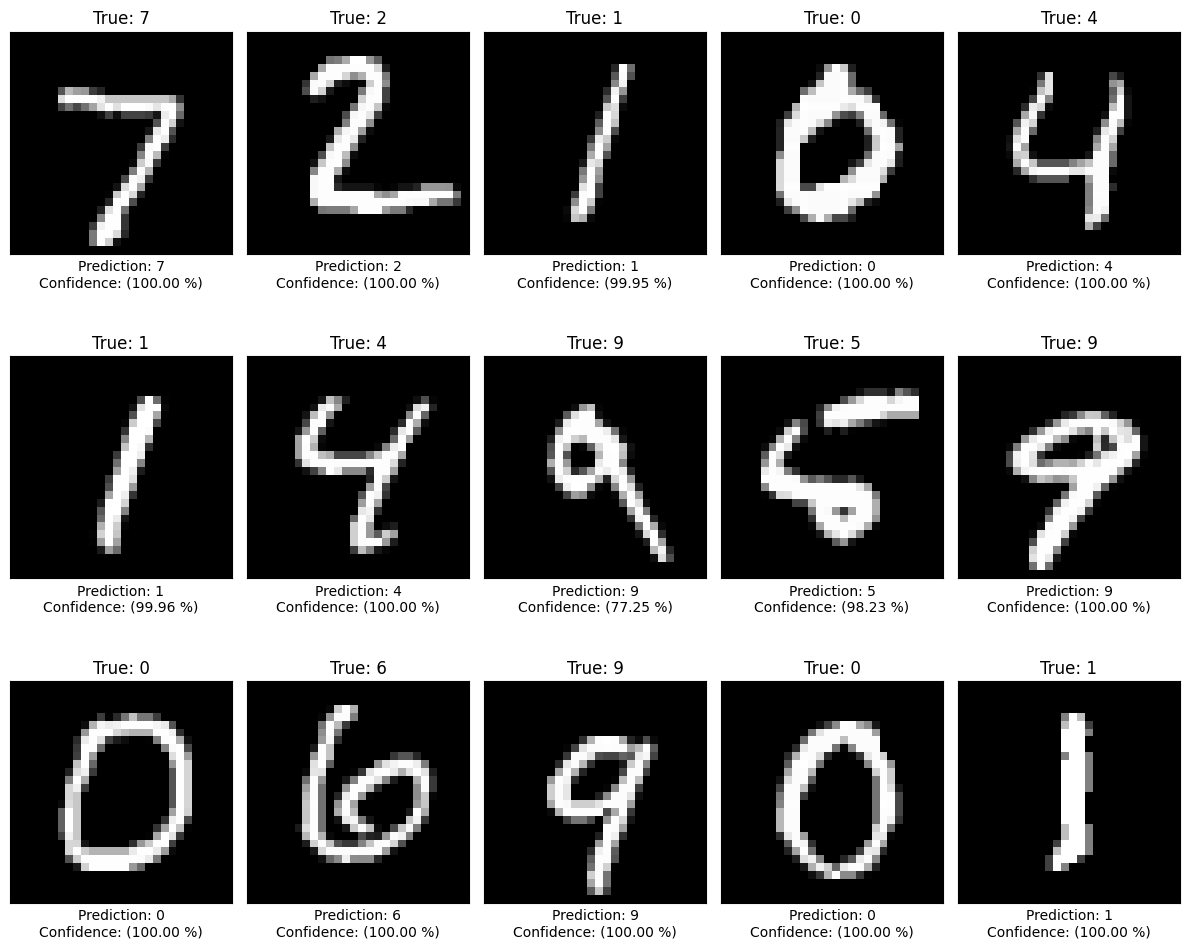

In [38]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()